In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Dataset 1: Employee Survey
survey_df = pd.DataFrame({
    'EmployeeID': range(1, 2001),
    'SatisfactionScore': np.random.randint(1, 11, size=2000),
    'WorkLifeBalance': np.random.choice([1, 2, 3, 4, 5, np.nan], size=2000, p=[0.15, 0.25, 0.25, 0.2, 0.05, 0.1]),
    'Salary': np.random.normal(60000, 15000, size=2000),
    'YearsAtCompany': np.random.randint(0, 30, size=2000),
    'Department': np.random.choice(['HR', 'IT', 'Sales', 'Operations', 'Finance'], size=2000)
})

# Add outliers to Salary
survey_df.loc[np.random.choice(survey_df.index, 10), 'Salary'] *= 5

# Dataset 2: HR Records
hr_df = pd.DataFrame({
    'EmployeeID': range(1, 2001),
    'Age': np.random.randint(22, 60, size=2000),
    'Gender': np.random.choice(['Male', 'male', 'F', 'Female', 'Other'], size=2000),
    'JobLevel': np.random.choice(['Entry', 'Mid', 'Senior', np.nan], size=2000, p=[0.4, 0.4, 0.15, 0.05]),
    'Turnover': np.random.choice(['Y', 'N'], size=2000, p=[0.2, 0.8])
})


In [3]:
survey_df.to_csv("mock_employee_survey.csv", index=False)
hr_df.to_csv("mock_hr_records.csv", index=False)


 # Step 1: Data Cleaning & Merging
 ## 1.1 Clean and Standardize Columns

In [26]:
# Fix inconsistent gender values
hr_df['Gender'] = hr_df['Gender'].str.lower().map({
    'male': 'Male',
    'female': 'Female',
    'f': 'Female',
    'other': 'Other'
})

# Correct — assignment directly to the DataFrame
survey_df ['WorkLifeBalance'] = survey_df ['WorkLifeBalance'].fillna(survey_df ['WorkLifeBalance'].median())    

# Correct — assignment directly to the DataFrame
hr_df ['JobLevel'] = hr_df ['JobLevel'].fillna(hr_df ['JobLevel'].mode()[0]) 

## 1.2 Merging Datasets

In [5]:
df = pd.merge(survey_df, hr_df, on='EmployeeID')


 # Step 2: Exploratory Data Analysis (EDA)
 ##  2.1 Summary Statistics & Correlation

        EmployeeID  SatisfactionScore  WorkLifeBalance         Salary  \
count  2000.000000        2000.000000      2000.000000    2000.000000   
mean   1000.500000           5.459000         2.779500   61052.712102   
std     577.494589           2.915745         1.097033   23068.338427   
min       1.000000           1.000000         1.000000   11408.434126   
25%     500.750000           3.000000         2.000000   50228.620702   
50%    1000.500000           5.000000         3.000000   59971.939851   
75%    1500.250000           8.000000         4.000000   69737.209539   
max    2000.000000          10.000000         5.000000  386470.841387   

       YearsAtCompany         Age  
count     2000.000000  2000.00000  
mean        14.461000    40.47500  
std          8.600957    10.81452  
min          0.000000    22.00000  
25%          7.000000    31.00000  
50%         14.000000    40.00000  
75%         22.000000    49.00000  
max         29.000000    59.00000  


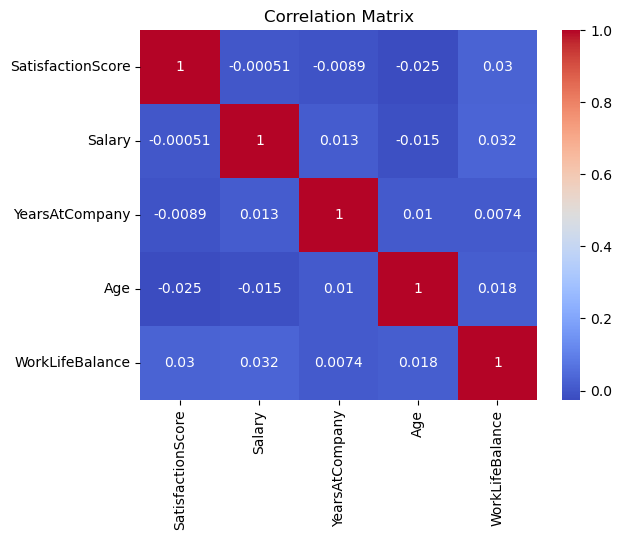

In [6]:
print(df.describe())

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix
numeric_cols = ['SatisfactionScore', 'Salary', 'YearsAtCompany', 'Age', 'WorkLifeBalance']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## 2.2 Visualizations

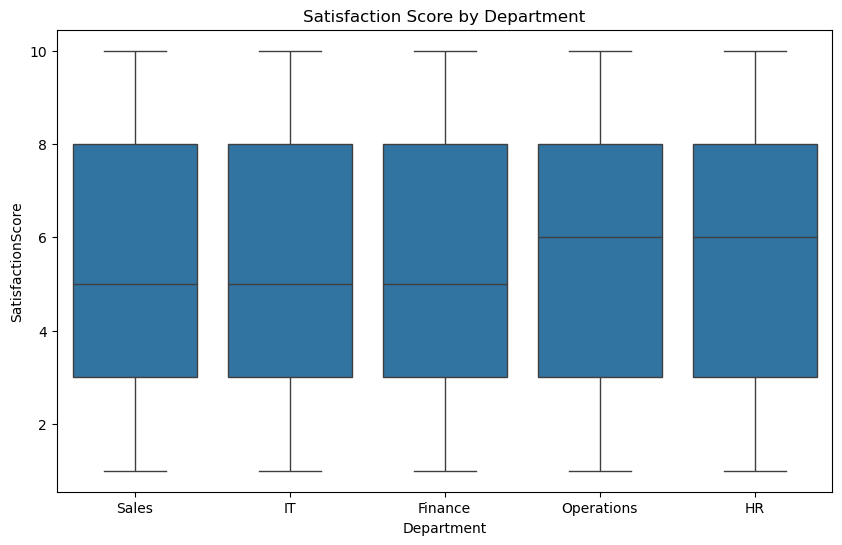

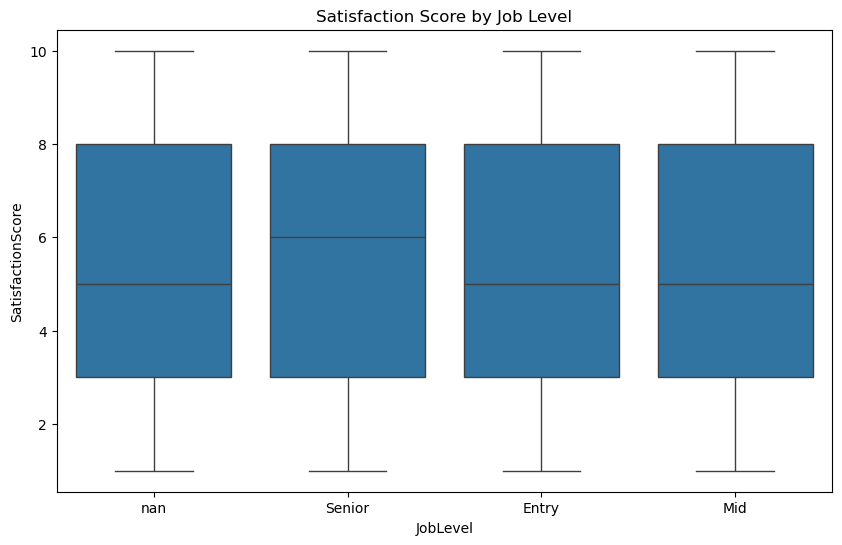

In [20]:
# Boxplot: Satisfaction by Department
plt.figure(figsize=(10,6))
sns.boxplot(x='Department', y='SatisfactionScore', data=df)
plt.title("Satisfaction Score by Department")
plt.show()

# Boxplot: Satisfaction by Job Level
plt.figure(figsize=(10,6))
sns.boxplot(x='JobLevel', y='SatisfactionScore', data=df)
plt.title("Satisfaction Score by Job Level")
plt.show()




# Step 3: Statistical Analysis
## 3.1 Regression to Identify Predictors

In [27]:
# First, make sure you have these installed:
# pip install numpy pandas statsmodels

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Let's say your DataFrame is called df
# Handle missing values first
# Fill missing values with the mean for numerical
for col in ['Salary', 'YearsAtCompany', 'WorkLifeBalance', 'Age', 'SatisfactionScore']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean()) 

# Fill missing for categorical with mode
for col in ['Department', 'JobLevel', 'Gender']:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(
    df,
    columns=['Department', 'JobLevel', 'Gender'], 
    drop_first=True
)

# Define predictors and response
X = df_encoded[['Salary', 'YearsAtCompany', 'WorkLifeBalance', 'Age'] + 
               [col for col in df_encoded.columns if col.startswith('Department_') or 
                 col.startswith('JobLevel_') or 
                 col.startswith('Gender_')]]

y = df_encoded['SatisfactionScore']

# Cast to float to avoid dtype issues 
X = X.astype(float)
y = y.astype(float)

# Add constant term to the model
X = sm.add_constant(X)

# Fit the OLS regression
model = sm.OLS(y, X).fit()

# Prints the regression summary
print(model.summary()) 


                            OLS Regression Results                            
Dep. Variable:      SatisfactionScore   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8064
Date:                Sun, 15 Jun 2025   Prob (F-statistic):              0.654
Time:                        03:58:54   Log-Likelihood:                -4972.4
No. Observations:                2000   AIC:                             9973.
Df Residuals:                    1986   BIC:                         1.005e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.36

C:\Users\geeze\AppData\Local\Temp\ipykernel_12928\1199611796.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


<!-- # 3.2 Evaluate Model
# Look for:

# R-squared > 0.3

# At least 3 predictors with p-value < 0.05
 -->


In [9]:
pd.get_dummies(df, drop_first=True)


,EmployeeID,SatisfactionScore,WorkLifeBalance,Salary,YearsAtCompany,Age,Department_HR,Department_IT,Department_Operations,Department_Sales,Gender_Male,Gender_Other,JobLevel_Mid,JobLevel_Senior,JobLevel_nan,Turnover_Y
0,1,7,3.0,73880.971362,26,29,False,False,False,True,False,False,False,False,True,True
1,2,4,3.0,60476.723522,19,30,False,True,False,False,False,False,False,True,False,False
2,3,8,4.0,85936.721521,17,28,False,False,False,False,True,False,False,False,False,True
3,4,5,1.0,61114.188661,13,35,False,False,True,False,False,True,False,False,False,False
4,5,7,2.0,76464.374473,17,49,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,3,1.0,46228.272413,18,36,False,False,False,True,False,False,True,False,False,True
1996,1997,7,4.0,36252.190065,18,57,True,False,False,False,False,False,False,False,False,False
1997,1998,5,1.0,61717.139397,20,48,True,False,False,False,False,False,False,False,False,False
1998,1999,2,4.0,83601.182213,26,27,False,False,True,False,False,False,False,False,False,False


In [ ]:
import statsmodels.formula.api as smf

# ANOVA with OLS
model = smf.ols('SatisfactionScore ~ C(Department)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA results:")
print(anova_table)

ANOVA results:
                     sum_sq      df         F    PR(>F)
C(Department)     54.319985     4.0  1.599267  0.171852
Residual       16940.318015  1995.0       NaN       NaN


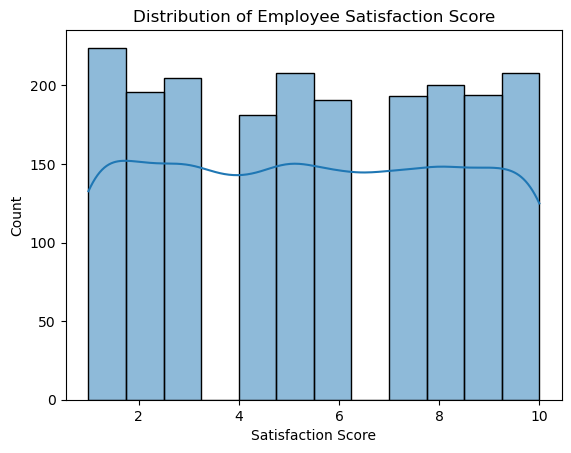

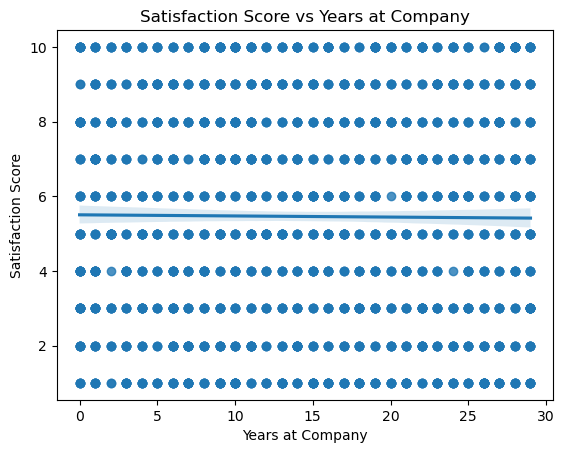

In [21]:
# Histogram of Satisfaction Score
plt.figure()
sns.histplot(df['SatisfactionScore'], kde=True)
plt.title("Distribution of Employee Satisfaction Score")
plt.xlabel("Satisfaction Score")
plt.show()

# Scatter plot with regression line
plt.figure()
sns.regplot(x='YearsAtCompany', y='SatisfactionScore', data=df)
plt.title("Satisfaction Score vs Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Satisfaction Score")
plt.show()
